In [ ]:
library('caret')
library('gbm')

# library('DESeq2')
# library('tidyverse')
# library('EnhancedVolcano')
# library('org.Hs.eg.db')
# library('clusterProfiler')
# library('ggplot2')
# library('gplots')

Loading required package: lattice

Loading required package: ggplot2

Loaded gbm 2.1.8



In [ ]:
x_train = read.delim('Train_call.txt', header = TRUE, sep = "\t", quote = "\"", dec = ".", fill = TRUE, comment.char = "")
y_train = read.delim('Train_clinical.txt', header = TRUE, sep = "\t", quote = "\"", dec = ".", fill = TRUE, comment.char = "", row.names = 1)

x_train = t(x_train)


In [ ]:
data <- merge(y_train, x_train[5:nrow(x_train),], by = 'row.names')
row.names(data) <- data$Row.names
data$Row.names <- NULL
head(data)

,Subgroup,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V2825,V2826,V2827,V2828,V2829,V2830,V2831,V2832,V2833,V2834
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Array.10,HER2+,0,0,0,0,0,0,0,0,0,⋯,1,1,0,1,1,1,1,1,1,1
Array.100,HR+,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
Array.101,HR+,0,0,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
Array.102,Triple Neg,0,0,0,0,-1,-1,-1,0,-1,⋯,1,1,1,1,1,1,1,1,1,1
Array.104,Triple Neg,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
Array.105,HER2+,0,0,0,0,0,0,0,0,-1,⋯,2,1,1,1,1,1,1,2,2,2


[1] 3

V2185 
 2185

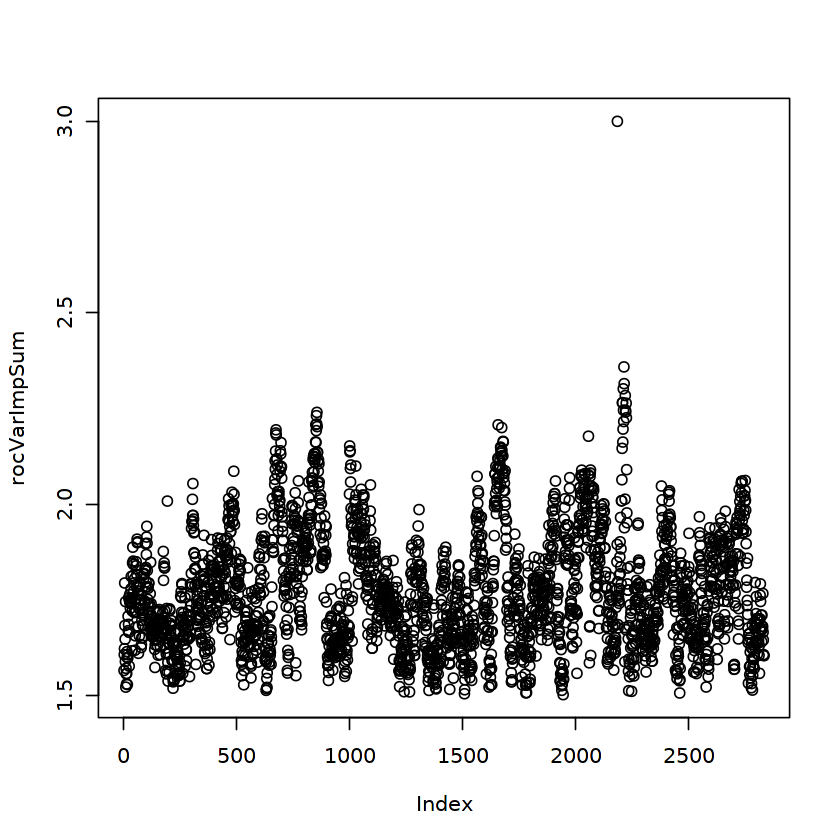

In [ ]:
rocVarImp <- filterVarImp(data[,-1], factor(data[,1]) , nonpara = FALSE)

rocVarImpSum <- apply(rocVarImp, 1, sum)
# as.data.frame(rocVarImpSum)
max(rocVarImpSum)
which.max(rocVarImpSum)
plot(rocVarImpSum)

,Subgroup,V2185,V2214,V2215,V2211,V2220,V2207,V2208,V2224,V2212,⋯,V1351,V2235,V2248,V1241,V1265,V1783,V1780,V2461,V1508,V1945
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Array.10,HER2+,2,-1,0,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,0,0,0,0,-1,0,0
Array.100,HR+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Array.101,HR+,0,0,0,0,0,0,0,0,0,⋯,1,0,0,1,-1,2,2,1,0,0
Array.102,Triple Neg,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,1,0,0,0
Array.104,Triple Neg,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Array.105,HER2+,2,0,0,0,0,0,0,0,0,⋯,1,0,1,0,0,0,0,1,0,0
Array.106,HER2+,2,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,2,0,0,-1,1,1,-1,0,0
Array.107,Triple Neg,-1,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,-1,-1
Array.110,HER2+,2,-1,-1,-1,-1,-1,-1,-1,-1,⋯,1,2,2,0,0,0,0,0,0,0


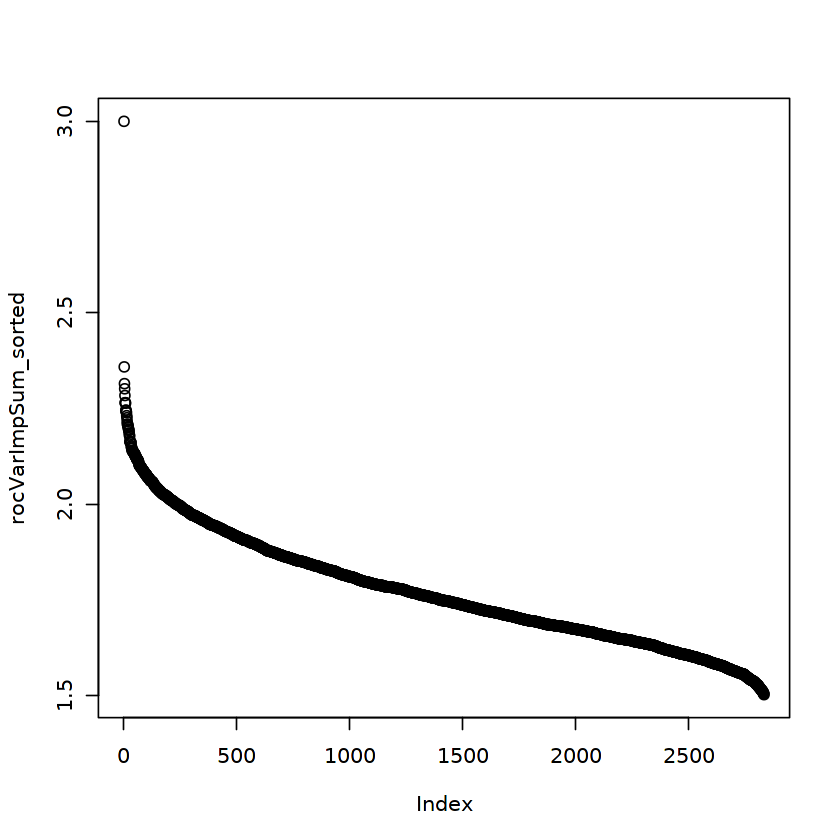

In [ ]:
n = 5

rocVarImpSum_sorted <- sort(rocVarImpSum, decreasing = TRUE)
plot(rocVarImpSum_sorted)

# sort the initial dataframe based on the sorted scores

sorted_idx <- strtoi(substring(names(rocVarImpSum_sorted), 2))

sorted_idx <- paste0('V', sorted_idx)
sorted_data <- data[,c('Subgroup', sorted_idx)]

sorted_data

In [ ]:
sessionInfo()

R version 4.0.4 (2021-02-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 10 (buster)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.13.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gbm_2.1.8       caret_6.0-86    ggplot2_3.3.3   lattice_0.20-41

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5         tidyselect_1.1.0     repr_1.1.3          
 [4] reshape2_1.4.4       purrr_0.3.4          splines_

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39982db8-5b4c-4eff-a4a1-5a43e95600e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>